In [1]:
import tensorflow as tf
import os
import numpy as np
import random
from Convert2numpy import get_numpy_file, nanClean, convertAndSave
from DataGenerator import DataGenerator
from Metrics_Evaluation import Evaluation
from PCEDNet import PCEDNet, generate_input
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [2]:
DATA_PATH = "Train2"
DATA_PATH_F = "Train"
VALIDATION_PATH = "Validation2"
VALIDATION_PATH_F = "Validation"
TEST_PATH = "Test2"
TEST_PATH_F = "Test"
MODEL_PATH = os.path.join("Model", "PCEDNET")

# Load Data

## Convert to numpy

In [7]:
for data_path in [DATA_PATH, VALIDATION_PATH, TEST_PATH]:
    if os.path.exists(data_path):
        shutil.rmtree(data_path)
    os.mkdir(data_path)

#Train
convertAndSave(DATA_PATH_F, DATA_PATH, ".ssm")
convertAndSave(DATA_PATH_F, DATA_PATH, ".lb")
#Validation
convertAndSave(VALIDATION_PATH_F, VALIDATION_PATH, ".ssm")
convertAndSave(VALIDATION_PATH_F, VALIDATION_PATH, ".lb")
#Test
convertAndSave(TEST_PATH_F, TEST_PATH, ".ssm")
convertAndSave(TEST_PATH_F, TEST_PATH, ".lb")

100%|██████████| 58/58 [00:01<00:00, 42.30it/s]


## Clean 

In [8]:
#train
nanClean(DATA_PATH, "_.ssm.npy")
#Validation
nanClean(VALIDATION_PATH, "_.ssm.npy")
#Test
nanClean(TEST_PATH, "_.ssm.npy")

In [3]:
model = PCEDNet().build()

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                              

                                                                                                  
 concatenate_12 (Concatenate)   (None, 12)           0           ['dense_10[0][0]',               
                                                                  'dense_11[0][0]']               
                                                                                                  
 dense_2 (Dense)                (None, 6)            78          ['concatenate_2[0][0]']          
                                                                                                  
 dense_5 (Dense)                (None, 6)            78          ['concatenate_5[0][0]']          
                                                                                                  
 dense_9 (Dense)                (None, 6)            78          ['concatenate_9[0][0]']          
                                                                                                  
 dense_12 

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

# Train

In [6]:
hist = model.fit(DataGenerator(DATA_PATH, generate_input, batch_size=8192*2), validation_data=DataGenerator(VALIDATION_PATH, generate_input, batch_size=1024), epochs=50,
         callbacks= tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=5, min_lr=0.0000001))

Epoch 1/50
234/234 [==============================] - 131s 231ms/step - loss: 0.5407 - accuracy: 0.7631 - val_loss: 0.3941 - val_accuracy: 0.8988 - lr: 0.0010
Epoch 2/50
234/234 [==============================] - 44s 186ms/step - loss: 0.3746 - accuracy: 0.8695 - val_loss: 0.2362 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 3/50
234/234 [==============================] - 43s 183ms/step - loss: 0.3396 - accuracy: 0.8729 - val_loss: 0.1711 - val_accuracy: 0.9620 - lr: 0.0010
Epoch 4/50
234/234 [==============================] - 53s 228ms/step - loss: 0.3009 - accuracy: 0.8956 - val_loss: 0.1948 - val_accuracy: 0.9469 - lr: 0.0010
Epoch 5/50
234/234 [==============================] - 33s 138ms/step - loss: 0.2666 - accuracy: 0.9080 - val_loss: 0.1366 - val_accuracy: 0.9659 - lr: 0.0010
Epoch 6/50
234/234 [==============================] - 41s 173ms/step - loss: 0.2769 - accuracy: 0.9049 - val_loss: 0.1529 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 7/50
234/234 [==============================]

<Figure size 1000x500 with 0 Axes>

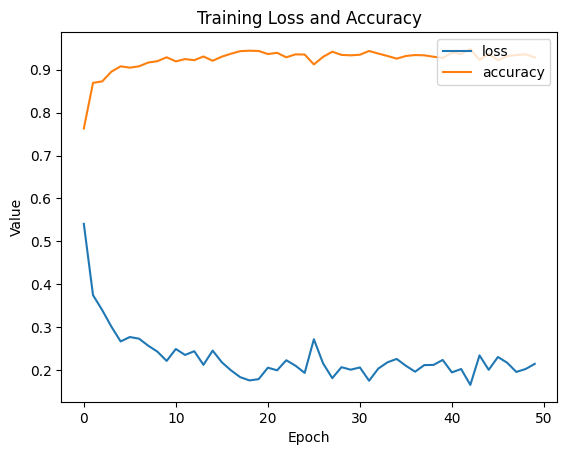

In [7]:
history_df = pd.DataFrame(hist.history)

# Plot the training loss and accuracy
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy']].plot()
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

# Evaluation

In [9]:
e1 = Evaluation(TEST_PATH, model, generate_input).eval_()
e1

44878/44878 [==============================] - 54s 1ms/step


,precision,recall,MCC,F1,accuracy,IoU
0,0.84001,0.779385,0.787741,0.808563,0.961279,0.678645


In [14]:
model.save(os.path.join(MODEL_PATH))

INFO:tensorflow:Assets written to: Model\PCEDNET\assets


INFO:tensorflow:Assets written to: Model\PCEDNET\assets
